In this notebook I'll show how to perform feature selection and after that I'll perform Machine learning using several algorithm and show you how to measure model performance and how to optimize the algorithm.

In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For Feature Selection
from sklearn.ensemble import ExtraTreesClassifier

# Machine Learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

# for evaluating the model performance
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# set style for the plots
sns.set_theme(style="darkgrid")

In [2]:
# importing the dataset
final_df = pd.read_csv('final_data.csv')
final_df.head() # see the top 5 rows of the dataset

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,0.57,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,0.57,1,0.0,0.0,0,1
4,0,0,6.39,0,0.57,0,0.0,0.0,0,1


#### Feature Selection

For this notebook I'll use "Univariate Feature Selection" technique

In [3]:
# Now first let's seperate the target from the features

x = final_df.iloc[:, 0:-1]
y = final_df.iloc[:, -1]

In [4]:
x.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
0,1,0,11.95,25,0.14,0,8.4,2.3,0
1,0,0,8.22,0,0.57,0,0.0,0.0,0
2,1,0,8.91,16,0.00,0,13.7,0.9,0
3,0,0,6.87,21,0.57,1,0.0,0.0,0
4,0,0,6.39,0,0.57,0,0.0,0.0,0


In [5]:
# checking the shape of training set
x.shape

(72274, 9)

Now, first let's split the dataset into train & test set after that I'll perform feature selection.
This because if we done this step before spliting this may cause bias

In [6]:
# spliting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 41)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(57819, 9) (14455, 9) (57819,) (14455,)


In [7]:
# For this notebook I'll use "Feature Importance" method
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.07274452 0.04439758 0.09081014 0.07831272 0.5283484  0.01061878
 0.09506409 0.06087304 0.01883072]


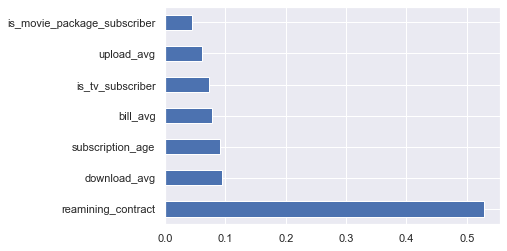

In [8]:
# Let's use a plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

Here we've choice these 7 features that explain almost 99% of the target prediction. So, we will use only these features for our model.

In [9]:
# columns of train set
x_train.columns

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'reamining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit'],
      dtype='object')

In [10]:
# keeping the top 5 features let's drop other features from our dataset
x_train.drop(['service_failure_count',  'download_over_limit'], 
             axis = 1, inplace = True)

In [11]:
# Let's do same for the test set
x_test.drop(['service_failure_count','download_over_limit'], 
             axis = 1, inplace = True)

In [12]:
# check the shape of training set
x_train.shape

(57819, 7)

In [13]:
x_train.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg
45705,0,0,2.79,17,0.57,16.5,2.0
42542,1,0,1.56,22,0.00,24.1,1.1
5359,1,1,2.65,21,0.50,0.0,0.0
1475,0,0,3.90,21,0.57,0.0,0.0
23478,0,0,2.59,24,0.57,25.7,2.1


In [14]:
# Before applying Machine Learning Let's scale the data
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

We've selectted top Seven predictors for this prediction. Now We will implement Machine Learning.

In this notebook I'll apply several Machine learning algorithm so that I can obtain the best performing algorithm.

## Machine Learning

#### LogisticRegression Classifier

In [15]:
log_cls = LogisticRegression(random_state=41, max_iter=75) # creating instance
log_cls.fit(x_train, y_train) # fitting the traing data

# Predicting for the test data
log_pred = log_cls.predict(x_test)

In [16]:
# let's create confusion matrix to see the accuracy
log_cm = confusion_matrix(y_test, log_pred)
log_acc = (log_cm[0,0]+log_cm[1,1])/(log_cm[0,0]+log_cm[0,1]+(log_cm[1,0]+log_cm[1,1]))

# precision
log_pre = precision_score(y_test, log_pred)

# recall
log_rec = recall_score(y_test, log_pred)


print('Accuracy: {}'.format(log_acc))
print('Precision: {}'.format(log_pre))
print('Recall: {}'.format(log_rec))

Accuracy: 0.8338291248702872
Precision: 0.8231268847135236
Recall: 0.8900175570604465


With logistic regression we've got an acccuracy of 83.3% Let's try some other other algorithms if we get more perfect accuracy. with a high precision and recall value. But the precision and recall value should be low.

#### KNeighborsClassifier

In [17]:
kn_cls = KNeighborsClassifier(n_neighbors=10, metric= 'minkowski', p =2)
kn_cls.fit(x_train, y_train) # fitting the model

# predicting output
kn_pred = kn_cls.predict(x_test)

In [18]:
# let's create confusion matrix to see the accuracy
kn_cm = confusion_matrix(y_test, kn_pred)
kn_acc = (kn_cm[0,0]+kn_cm[1,1])/(kn_cm[0,0]+kn_cm[0,1]+(kn_cm[1,0]+kn_cm[1,1]))

# precision
kn_pre = precision_score(y_test, kn_pred)

# recall
kn_rec = recall_score(y_test, kn_pred)


print('Accuracy: {}'.format(kn_acc))
print('Precision: {}'.format(kn_pre))
print('Recall: {}'.format(kn_rec))

Accuracy: 0.8998270494638534
Precision: 0.9284401260504201
Recall: 0.8867569601203913


With KNeighboursClassifier we got 89.9% of accuracy.  KNN algoritm has higher precision & recall value than logistic model

#### DecisionTreeClassifier

In [19]:
d_tree = DecisionTreeClassifier(criterion='entropy') # creating instance
d_tree.fit(x_train, y_train) # fitting the training data

# predicting the 
d_tree_pred = d_tree.predict(x_test)

In [20]:
# let's create confusion matrix to see the accuracy
d_tre_cm = confusion_matrix(y_test, d_tree_pred)
d_tree_acc = (d_tre_cm[0,0]+d_tre_cm[1,1])/(d_tre_cm[0,0]+d_tre_cm[0,1]+(d_tre_cm[1,0]+d_tre_cm[1,1]))

# precision
d_tree_pre = precision_score(y_test, d_tree_pred)

# recall
d_tree_rec = recall_score(y_test, d_tree_pred)


print('Accuracy: {}'.format(d_tree_acc))
print('Precision: {}'.format(d_tree_pre))
print('Recall: {}'.format(d_tree_rec))

Accuracy: 0.9119335869941196
Precision: 0.9245976428842986
Recall: 0.9149736644093304


With DecisionTreeClassifier we got 91.02% of accuracy

#### RandomForestClassifier

In [21]:
random_forest = RandomForestClassifier(n_estimators= 13, criterion='entropy')
random_forest.fit(x_train, y_train) # fitting the model

# predicting 
random_pred = random_forest.predict(x_test)

In [22]:
# let's create confusion matrix to see the accuracy
random_cm = confusion_matrix(y_test, random_pred)
random_acc = (random_cm[0,0]+random_cm[1,1])/(random_cm[0,0]+random_cm[0,1]+(random_cm[1,0]+random_cm[1,1]))

# precision
random_pre = precision_score(y_test, random_pred)

# recall
random_rec = recall_score(y_test, random_pred)


print('Accuracy: {}'.format(random_acc))
print('Precision: {}'.format(random_pre))
print('Recall: {}'.format(random_rec))

Accuracy: 0.935385679695607
Precision: 0.9517453798767967
Recall: 0.9300225733634312


With RandomForestClassifier we've got an accuracy of 93.45% which is good and highest accuracy till now.. Let's use one more classifer

#### Support Vector Machine Classifier

In [23]:
svc = SVC(kernel= 'sigmoid', random_state= 41)
svc.fit(x_train, y_train)

# prediction
svc_pred = svc.predict(x_test)

In [24]:
# let's create confusion matrix to see the accuracy
svc_cm = confusion_matrix(y_test, svc_pred)
svc_acc = (svc_cm[0,0]+svc_cm[1,1])/(svc_cm[0,0]+svc_cm[0,1]+(svc_cm[1,0]+svc_cm[1,1]))

# precision
svc_pre = precision_score(y_test, svc_pred)

# recall
svc_rec = recall_score(y_test, svc_pred)


print('Accuracy: {}'.format(svc_acc))
print('Precision: {}'.format(svc_pre))
print('Recall: {}'.format(svc_rec))

Accuracy: 0.7432722241438948
Precision: 0.7644869090457873
Recall: 0.77263606721846


SVC model perform not so good and it's precision & recall value are less than previous models

### Performance at a Glance
Now let's see how all the algoritm perform and compare them & select which one will be the final model

In [25]:
# creating performance dictionary
performance = {'Accuracy_Score':[log_acc, kn_acc, d_tree_acc, random_acc, svc_acc],
              'Precision':[log_pre, kn_pre, d_tree_pre, random_pre, svc_pre],
              'Recall': [log_rec, kn_rec, d_tree_rec, random_rec, svc_rec]}

In [26]:
performance_df = pd.DataFrame(data = performance, index= ['Logistic Regression', 'KNeighbors', 
                                                          'DecisionTree', 'RandomForest',
                                                          'SVC'])

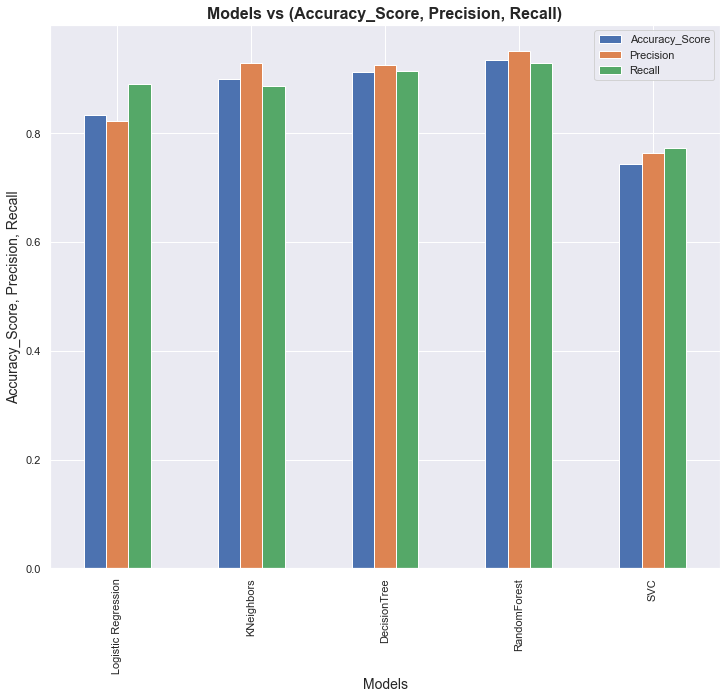

In [27]:
# Model performance chart

ax1 = performance_df.plot(kind="bar", figsize=(12,10))
ax1.set_title('Models vs (Accuracy_Score, Precision, Recall)', fontdict= {'weight': 'bold',
        'size': 16})
ax1.set_xlabel('Models', fontdict= {'size': 14})
ax1.set_ylabel('Accuracy_Score, Precision, Recall',fontdict= {'size': 14})
plt.show()

Here we can see the top three algorithm for this problem is "KNeighbour, Decision Tree & Random Forest" SO, for this problem anyone of these there can be used.

Now let's choose one algorithm and try to optimize it. For this problem I'll choose "Decision Tree" though "Random Forest" perform a little better than "Decision Tree". Since I've already shown how to optimize "Random Forest" in previous project so for this one I'll go with to so that I can show you how to optimize it.

#### Model Optimization/ Hyper parameter Tuning

In [28]:
# Creating parameters
criterion=['gini', 'entropy']
min_samples_split= [2, 5, 7]
min_samples_leaf = [1, 2, 3, 5]
max_depth = [3, 5, 9, 10, 11, None]
max_features=[0.25, 0.5, 1, None]
random_state = [0, 41, 42, 101]
max_leaf_nodes=[1, 5, 10, 25, None]

In [29]:
# Creating parameter dictionary

params = {
    'criterion': criterion,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_depth': max_depth,
    'random_state': random_state,
    'max_features': max_features,
    'max_leaf_nodes': max_leaf_nodes

}

In [30]:
d_tree = DecisionTreeClassifier()

In [31]:
d_tree_search = RandomizedSearchCV(d_tree, param_distributions=params, cv = 5, verbose=2, scoring = 'roc_auc', n_iter=5)

In [32]:
d_tree_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END criterion=gini, max_depth=9, max_features=0.5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=7, random_state=41; total time=   0.0s
[CV] END criterion=gini, max_depth=9, max_features=0.5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=7, random_state=41; total time=   0.0s
[CV] END criterion=gini, max_depth=9, max_features=0.5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=7, random_state=41; total time=   0.0s
[CV] END criterion=gini, max_depth=9, max_features=0.5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=7, random_state=41; total time=   0.0s
[CV] END criterion=gini, max_depth=9, max_features=0.5, max_leaf_nodes=10, min_samples_leaf=3, min_samples_split=7, random_state=41; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=0.5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, random_state=42; total time=   0.0s
[CV] END criterion=gini, m

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 9, 10, 11, None],
                                        'max_features': [0.25, 0.5, 1, None],
                                        'max_leaf_nodes': [1, 5, 10, 25, None],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 7],
                                        'random_state': [0, 41, 42, 101]},
                   scoring='roc_auc', verbose=2)

In [33]:
# Finding best parameters
d_tree_search.best_params_

{'random_state': 0,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 5,
 'max_features': None,
 'max_depth': 3,
 'criterion': 'entropy'}

In [34]:
d_tree_search.best_score_

0.9452508011146389

We've found the optimum parameters for the decision tree algorithm. Now let's make the final model.

In [35]:
final_d_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 5, min_samples_leaf = 5, max_leaf_nodes = 5,
                                      max_features = None, max_depth = 3, random_state = 0)

In [36]:
final_d_tree.fit(x_train, y_train)

# Predicting target
y_pred = final_d_tree.predict(x_test)

In [38]:
# creating confution matrix
cm_dt = confusion_matrix(y_test, y_pred)
cm_dt

array([[6057,  424],
       [ 681, 7293]], dtype=int64)

In [39]:
acc_dt = (cm_dt[0,0]+cm_dt[1,1])/(cm_dt[0,0]+cm_dt[1,1]+cm_dt[0,1]+cm_dt[1,0])
acc_dt

0.9235558630231754

Here we've found about 92% accuracy which is great. Now let's see precision & Recall values.

In [40]:
dt_pre = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)

print("Precision: {}".format(dt_pre))
print("Recall: {}".format(dt_recall))

Precision: 0.9450563690553324
Recall: 0.9145974416854779


Here we've got a high precision & recall value which is good.

In [41]:
# Importing functions for roc_curve and auc score

from sklearn.metrics import roc_curve, roc_auc_score

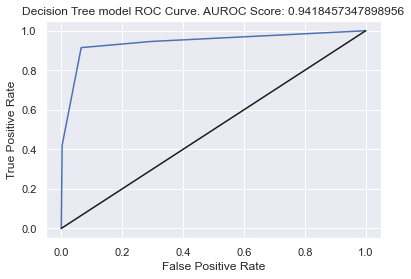

In [42]:
# Now let's generate predict probabilities for the test dataset
pred_proba = final_d_tree.predict_proba(x_test)[:,1]

# calculating TPR: True Positive Rate, FPT: False Positive Rate

fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

# ploting ROC Curve

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# calculating AUROC Score
auroc = roc_auc_score(y_test, pred_proba)
plt.title('Decision Tree model ROC Curve. AUROC Score: {}'.format(auroc))
plt.show()

We can see that the roc curve increased to zero soon which means the algorithm learns quickly and perform well.

Thus we've completed this project.